In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [35]:
np.random.seed(0)
data_size=1000

In [36]:
# Define means and covariances for each cluster
mu1 = [2, 2]
sigma1 = [[0.9, -0.0255], [-0.0255, 0.9]]

mu2 = [5, 5]
sigma2 = [[0.5, 0], [0, 0.3]]

mu3 = [-2, -2]
sigma3 = [[1, 0], [0, 0.9]]

mu4 = [-4, 8]
sigma4 = [[0.8, 0], [0, 0.6]]

data1 = np.random.multivariate_normal(mu1, sigma1, size=data_size // 4)
data2 = np.random.multivariate_normal(mu2, sigma2, size=data_size // 4)
data3 = np.random.multivariate_normal(mu3, sigma3, size=data_size // 4)
data4 = np.random.multivariate_normal(mu4, sigma4, size=data_size // 4)
# Concatenate the data from all clusters
data = np.vstack((data1, data2, data3, data4))



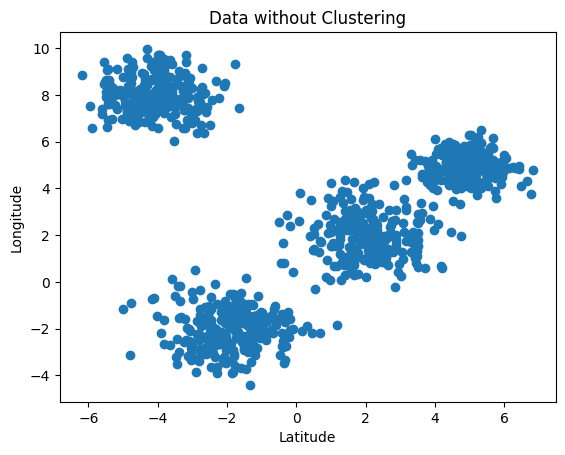

In [37]:
plt.scatter(data[:, 0], data[:, 1])
plt.title('Data without Clustering')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

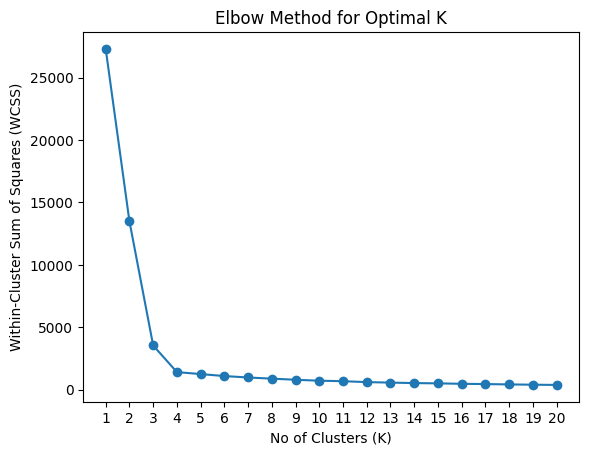

In [38]:

wcss_list = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    
    # Fit K-Means to the generated data
    kmeans.fit(data)
    
    # Calculate WCSS (inertia) and store it in the list
    wcss_list.append(kmeans.inertia_)

# Step 6: Visualize the Elbow Method
plt.plot(range(1, 21), wcss_list,marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('No of Clusters (K)')
plt.xticks(range(1,21))
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [39]:


# Use KMeans from Sklearn
k = 4  # Number of clusters

# Create KMeans instance
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)

# Fit the model to the data
kmeans.fit(data)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Get cluster centers
centers = kmeans.cluster_centers_

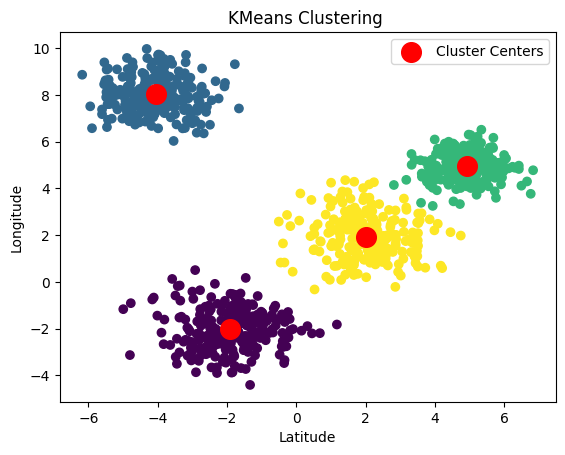

In [40]:
# Visualize the data and clusters
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, label='Cluster Centers')
plt.title('KMeans Clustering ')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.show()